In [2]:
import pandas as pd
df = pd.read_csv('../fake_job_postings.csv')


In [3]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
df

job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2             US, IA, Wever          NaN          NaN   
3        US, DC, Washington        Sales          NaN   
4        US, FL, Fort Worth          NaN          NaN   
...                     ...          ...          ...   
17875       CA, ON, Toronto        Sales          NaN   
17876  US, PA, Philadelphia   Accounting          NaN   
17877       US, TX, Houston          NaN          NaN   
17878         NG, LA, Lagos          NaN          NaN   
17879     NZ, N, Wellington  Engineering          NaN   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                NaN   
17879  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17875  To ace this role you:Will eat comprehensive St...   
17876  - B.A. or B.S. in Accounting- Desire to have f...   
17877  At least 12 years professional experience.Abil...   
17878  1. Must be fluent in the latest versions of Co...   
17879  We want to hear from you if:You have an in-dep...   

                                                benefits  telecommuting  \
0                                                    NaN              0   
1      What you will get from usThrough being part of...              0   
2                                                    NaN              0   
3      Our culture is anything but corpora

In [4]:
# Check for null values
grouped_null_percentage = df.groupby('fraudulent').apply(lambda x: x.isnull().mean() * 100)
grouped_null_percentage = grouped_null_percentage.T.round(2)
print(grouped_null_percentage)


fraudulent               0      1
job_id                0.00   0.00
title                 0.00   0.00
location              1.92   2.19
department           64.75  61.32
salary_range         84.45  74.25
company_profile      15.99  67.78
description           0.00   0.12
requirements         14.94  17.78
benefits             40.25  42.03
telecommuting         0.00   0.00
has_company_logo      0.00   0.00
has_questions         0.00   0.00
employment_type      18.98  27.83
required_experience  38.88  50.23
required_education   44.99  52.08
industry             27.20  31.76
function             35.96  38.91
fraudulent            0.00   0.00


In [5]:
# Deduplicate based on all columns except 'job_id'
df_dedup = df.drop_duplicates(subset=[col for col in df.columns if col != 'job_id'])
print(f"Original shape: {df.shape}, Deduplicated shape: {df_dedup.shape}")

Original shape: (17880, 18), Deduplicated shape: (17599, 18)


In [6]:
# Columns to consider for identifying duplicates (ignore 'job_id' and 'fraudulent')
cols_to_check = df.columns.difference(['job_id', 'fraudulent'])

# Identify duplicates based on all columns except 'job_id' and 'fraudulent'
dup_mask = df.duplicated(subset=cols_to_check, keep=False)
df_duplicates = df[dup_mask].sort_values(by=list(cols_to_check))
print(f"Found {df_duplicates.shape[0]} duplicated rows (ignoring job_id and fraudulent).")

# Check if duplicated rows have consistent 'fraudulent' labels
inconsistent_labels = df.groupby(list(cols_to_check))['fraudulent'].nunique()
inconsistent_count = (inconsistent_labels > 1).sum()
print(f"Number of groups with inconsistent 'fraudulent' labels: {inconsistent_count}")


Found 527 duplicated rows (ignoring job_id and fraudulent).
Number of groups with inconsistent 'fraudulent' labels: 0


Presense of duplicated rows ignoring job_id & target label, duplicated rows all have the same target label

## Values for each row

### Identified columns to compare for uniqueness
- 'title'
- 'description'
- 'requirements'
- 'employment_type'
- 'location'

In [7]:
# Get value counts for each column
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].value_counts().head())
    print(f"Null values: {df[column].isnull().sum()}")
    print(f"Unique values: {df[column].nunique()}")
    print("-" * 50)
    


job_id:
job_id
1        1
11919    1
11925    1
11924    1
11923    1
Name: count, dtype: int64
Null values: 0
Unique values: 17880
--------------------------------------------------

title:
title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
Name: count, dtype: int64
Null values: 0
Unique values: 11231
--------------------------------------------------

location:
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
Name: count, dtype: int64
Null values: 346
Unique values: 3105
--------------------------------------------------

department:
department
Sales          551
Engineering    487
Marketing      401
Operations     270
IT             225
N

In [8]:
# Further analyze interested columns
# show full value_counts (not truncated)
pd.set_option('display.max_rows', None)

for col in ['title', 'employment_type', 'location']:
    print(f"\n--- {col} ---")
    display(df[col].value_counts(dropna=False))

# restore default
pd.reset_option('display.max_rows')

# Show unique values for each column to identify "unknown" types
cols_to_check = ['required_experience', 'required_education', 'industry', 'function']

for col in cols_to_check:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))


--- title ---


title
English Teacher Abroad                                                                                                                            311
Customer Service Associate                                                                                                                        146
Graduates: English Teacher Abroad (Conversational)                                                                                                144
English Teacher Abroad                                                                                                                             95
Software Engineer                                                                                                                                  86
English Teacher Abroad (Conversational)                                                                                                            83
Customer Service Associate - Part Time                                                        


--- employment_type ---


employment_type
Full-time    11620
NaN           3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64


--- location ---


location
GB, LND, London                                                                                                                                                                                  718
US, NY, New York                                                                                                                                                                                 658
US, CA, San Francisco                                                                                                                                                                            472
GR, I, Athens                                                                                                                                                                                    464
NaN                                                                                                                                                                                              346
US, , 


Unique values in 'required_experience':
required_experience
NaN                 7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

Unique values in 'required_education':
required_education
NaN                                  8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

Unique values in 'industry':
industry
N

In [38]:
!pip install wordcloud missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [missingno]


Shape: (17880, 18)


job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

object    13
int64      5
Name: count, dtype: int64


Top missing columns:


n_missing  pct_missing
salary_range             15012     0.839597
department               11547     0.645805
required_education        8105     0.453300
benefits                  7212     0.403356
required_experience       7050     0.394295
function                  6455     0.361018
industry                  4903     0.274217
employment_type           3471     0.194128
company_profile           3308     0.185011
requirements              2696     0.150783

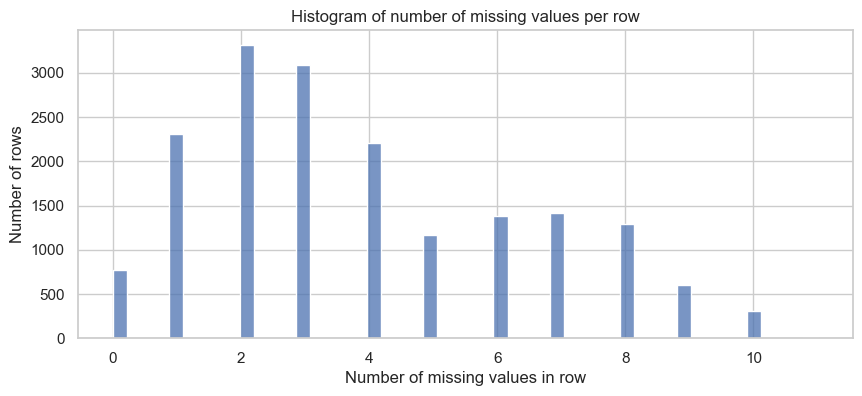

<Figure size 1200x600 with 0 Axes>

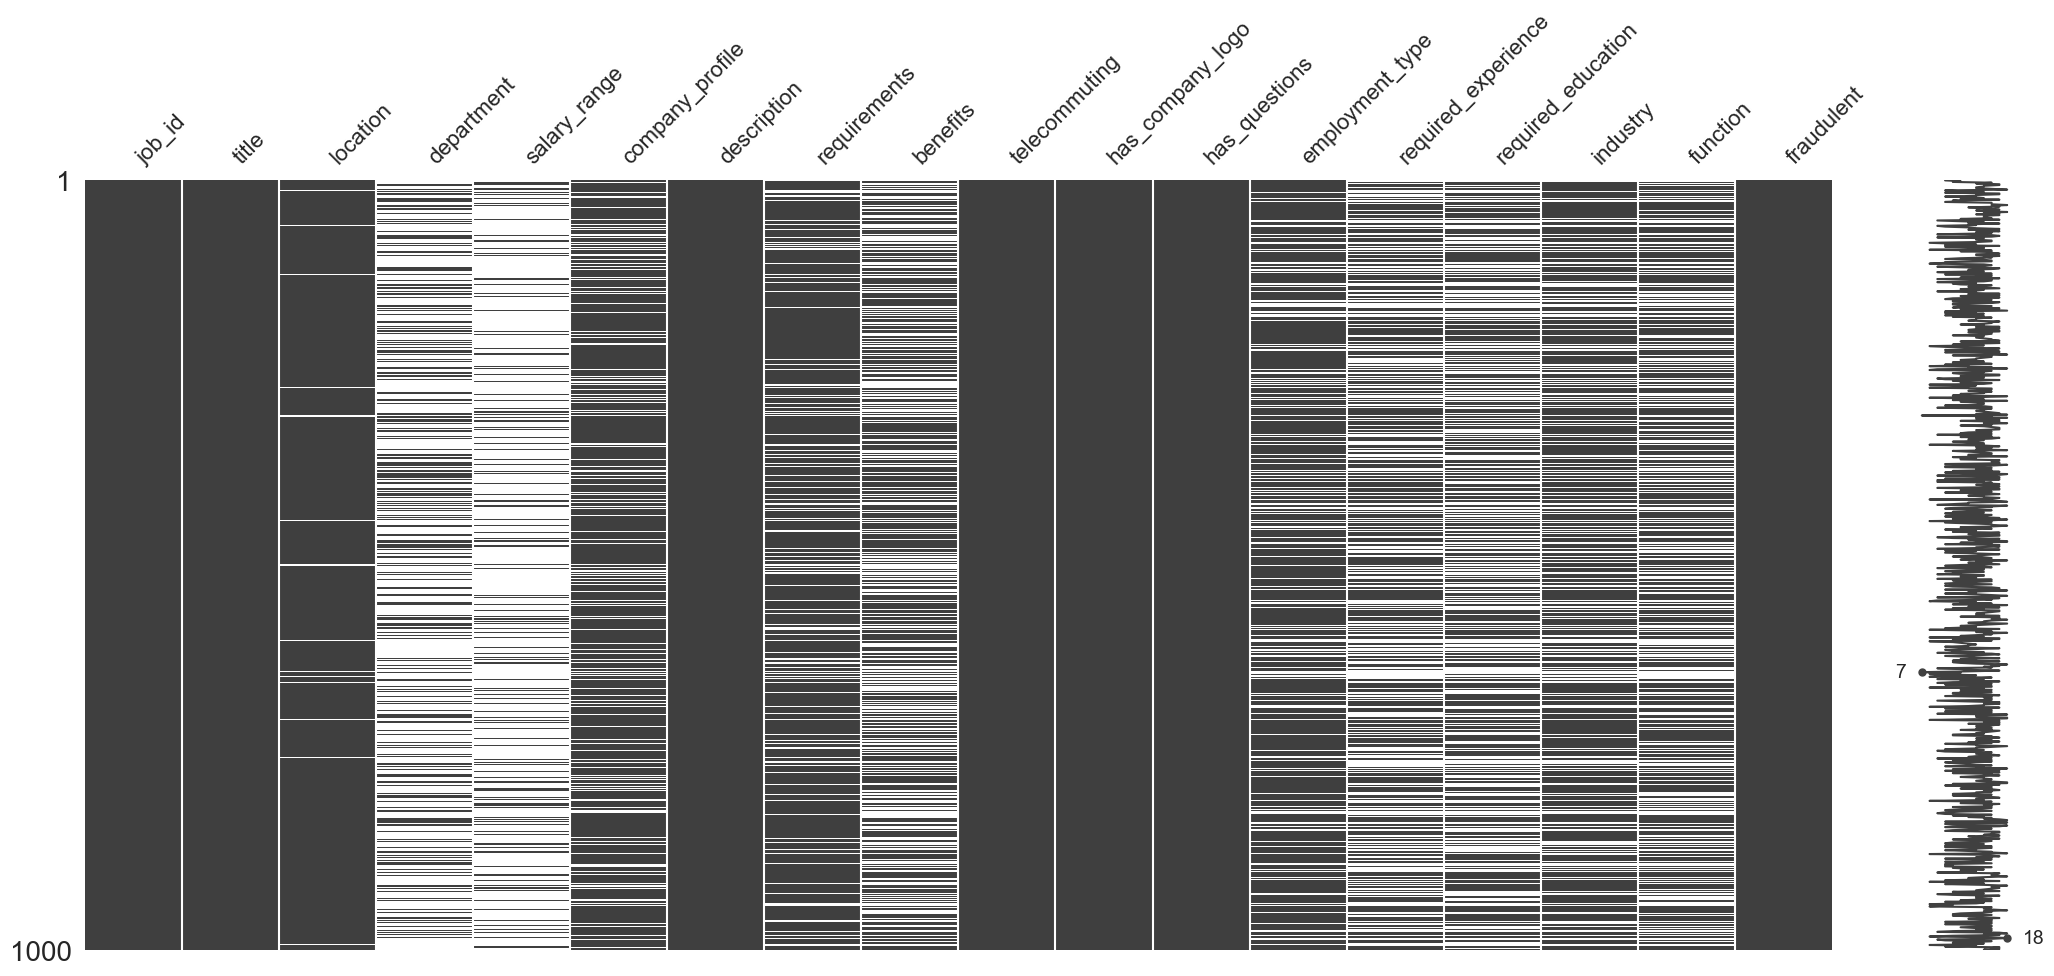


Duplicate summary:


n_total_duplicates        0
n_unique_rows         17880
n_all_rows            17880
dtype: int64


Text columns to process: ['benefits', 'description', 'company_profile', 'requirements']


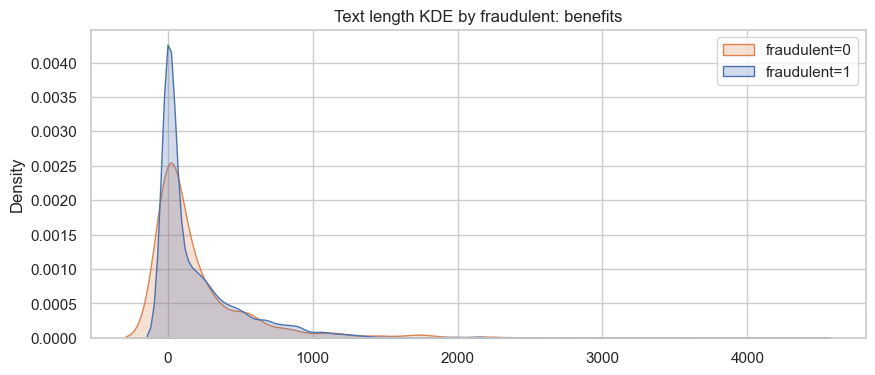

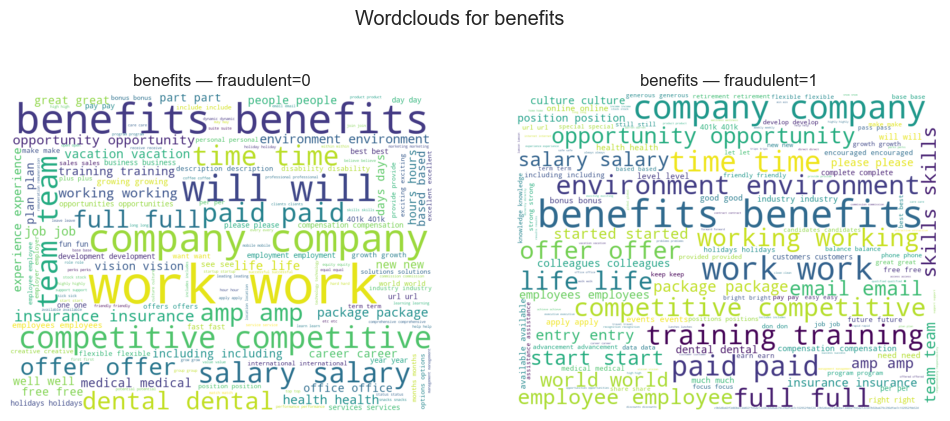

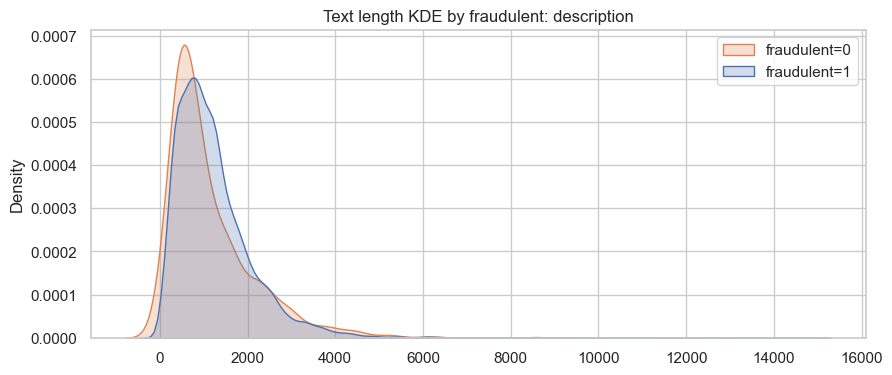

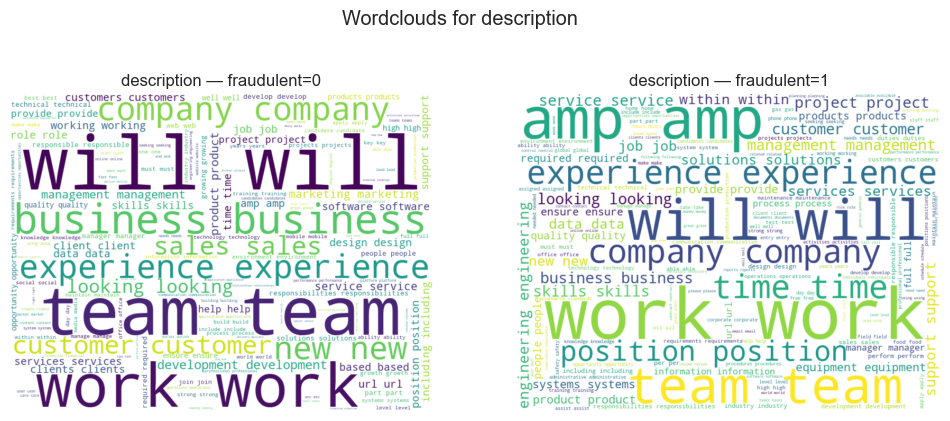

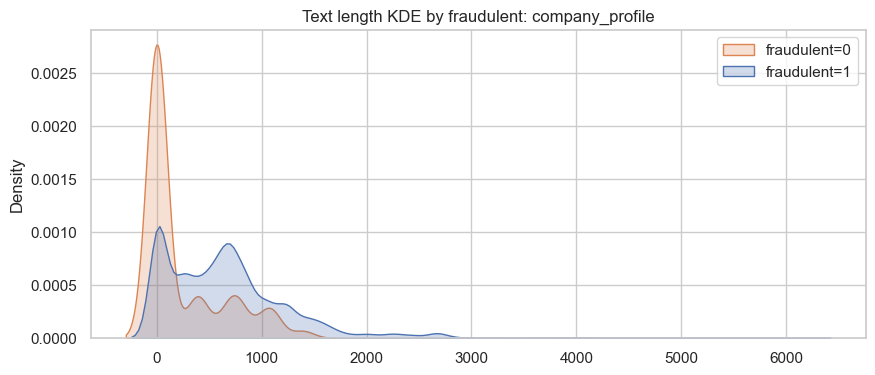

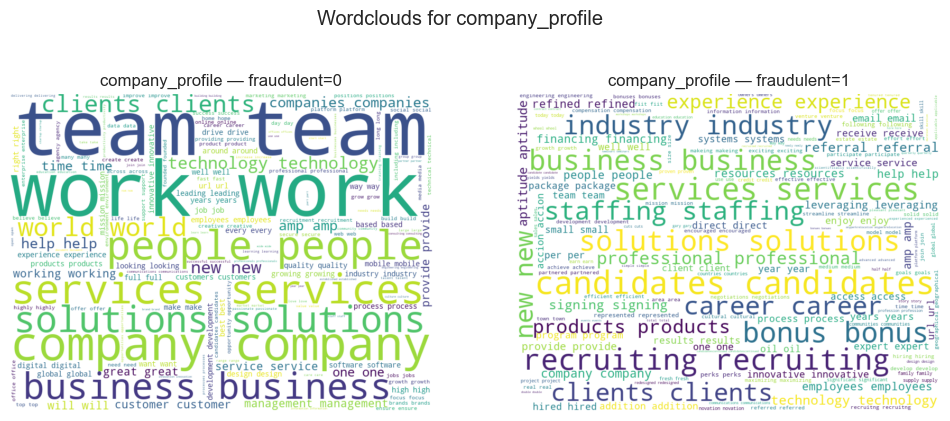

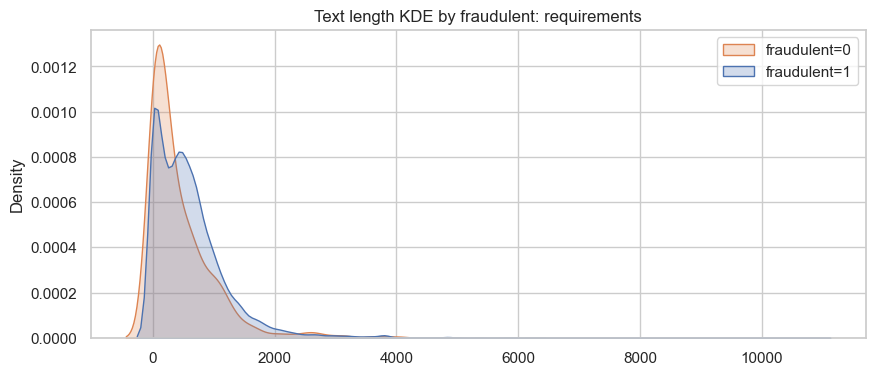

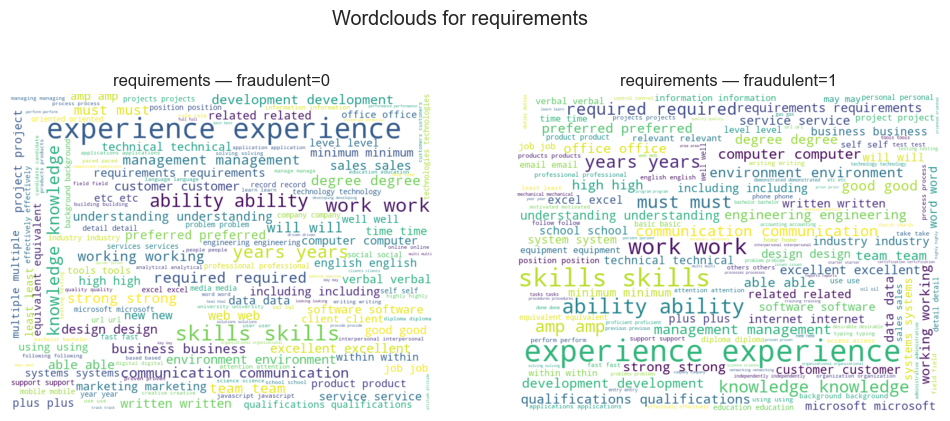

<Figure size 1000x600 with 0 Axes>

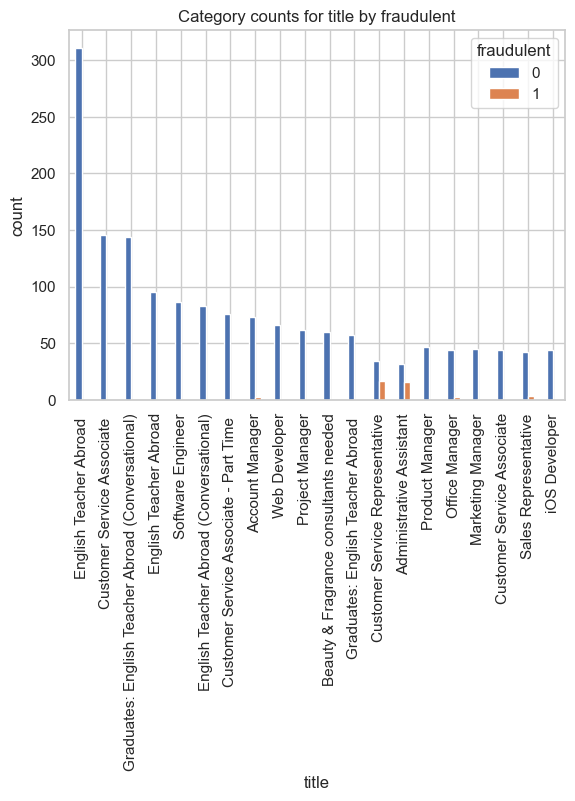

KeyError: '[nan] not in index'

<Figure size 1000x600 with 0 Axes>

In [40]:
# Updated EDA function: adds text-column wordclouds split by fraud label
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain

try:
    from wordcloud import WordCloud, STOPWORDS
    _HAS_WORDCLOUD = True
except Exception:
    _HAS_WORDCLOUD = False

try:
    import missingno as msno
    _HAS_MISSINGNO = True
except Exception:
    _HAS_MISSINGNO = False

sns.set(style="whitegrid")

def eda_rows_visuals(
    df,
    out_dir="eda_plots",
    sample_for_pairplot=200,
    top_n_categories=20,
    show_plots=True,
    save_plots=True,
    text_cols=None,
    fraud_col='fraudulent',
    extra_stopwords=None
):
    """
    Row-centered EDA. Extended: for text columns (text_cols) create two wordclouds
    each (fraud==1 vs fraud==0) and compare distributions by fraud label.

    Parameters
    ----------
    df : pd.DataFrame
    out_dir : str
        Directory where plots/CSVs are saved.
    sample_for_pairplot : int | None
        If provided and enough numeric columns exist, draw pairplot of sample.
    top_n_categories : int
        Limit for category counts plotting.
    show_plots : bool
        Display plots inline (use notebooks).
    save_plots : bool
        Save plot image files to out_dir.
    text_cols : list[str] | None
        Columns containing free text (treated as text, not categorical). Default:
        ['benefits','description','company_profile','requirements'] if present.
    fraud_col : str
        Column name that marks fraud (0 or 1). If not present, fraud-splitting steps are skipped.
    extra_stopwords : set[str] | None
        Additional stopwords to exclude from wordclouds.
    Returns
    -------
    dict : summary DataFrames and small dictionaries
    """
    os.makedirs(out_dir, exist_ok=True)
    results = {}

    # default text columns (common in your dataset)
    default_text_cols = ['benefits','description','company_profile','requirements']
    if text_cols is None:
        text_cols = [c for c in default_text_cols if c in df.columns]

    # Basic inspection
    print("Shape:", df.shape)
    display(df.head())
    display(df.dtypes.value_counts())

    # Column missingness summary
    missing_summary = pd.DataFrame({
        "n_missing": df.isna().sum(),
        "pct_missing": df.isna().mean()
    }).sort_values("n_missing", ascending=False)
    results['missing_summary'] = missing_summary
    print("\nTop missing columns:")
    display(missing_summary.head(10))

    # Row-level missingness and numeric row stats
    row_n_missing = df.isna().sum(axis=1)
    row_non_null = df.notna().sum(axis=1)
    row_stats = pd.DataFrame({
        "n_missing": row_n_missing,
        "non_null_count": row_non_null
    }, index=df.index)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) > 0:
        row_stats['row_sum_numeric'] = df[numeric_cols].sum(axis=1, skipna=True)
        row_stats['row_mean_numeric'] = df[numeric_cols].mean(axis=1, skipna=True)
    results['row_stats'] = row_stats

    # Plot: histogram of n_missing per row
    plt.figure(figsize=(10,4))
    sns.histplot(row_stats['n_missing'], bins=50, kde=False)
    plt.title('Histogram of number of missing values per row')
    plt.xlabel('Number of missing values in row')
    plt.ylabel('Number of rows')
    if save_plots:
        plt.savefig(os.path.join(out_dir, 'hist_row_n_missing.png'), bbox_inches='tight')
    if show_plots: plt.show()
    plt.close()

    # Missingness matrix/heatmap
    if _HAS_MISSINGNO:
        plt.figure(figsize=(12,6))
        msno.matrix(df.sample(n=min(len(df), 1000)))
        if save_plots:
            plt.savefig(os.path.join(out_dir, 'missingno_matrix_sample.png'), bbox_inches='tight')
        if show_plots: plt.show()
        plt.close()
    else:
        sample_rows = df.sample(n=min(300, len(df)), random_state=42)
        miss = sample_rows.isnull().astype(int)
        plt.figure(figsize=(14,6))
        sns.heatmap(miss.T, cbar=False, cmap='viridis')
        plt.title('Missingness heatmap (sample rows x columns)')
        if save_plots:
            plt.savefig(os.path.join(out_dir, 'missing_heatmap_sample.png'), bbox_inches='tight')
        if show_plots: plt.show()
        plt.close()

    # Duplicates
    dup_mask = df.duplicated(keep=False)
    dup_summary = {
        "n_total_duplicates": int(dup_mask.sum()),
        "n_unique_rows": int(df.drop_duplicates().shape[0]),
        "n_all_rows": int(df.shape[0])
    }
    results['duplicate_summary'] = pd.Series(dup_summary)
    print("\nDuplicate summary:")
    display(pd.Series(dup_summary))
    if dup_mask.any():
        display(df[dup_mask].head(20))
        if save_plots:
            df[dup_mask].head(200).to_csv(os.path.join(out_dir, 'sample_duplicate_rows.csv'), index=True)

    # --- New section: treat text_cols as text, produce wordclouds split by fraud_col ---
    # Prepare stopwords
    stopwords = set(STOPWORDS) if _HAS_WORDCLOUD else set()
    if extra_stopwords:
        stopwords |= set(extra_stopwords)

    text_summary = {}
    if len(text_cols) > 0:
        print("\nText columns to process:", text_cols)
        for col in text_cols:
            col_safe = col.replace('/','_').replace(' ','_')
            # Ensure strings and handle NaN
            texts = df[col].fillna('').astype(str)

            # generate basic stats: length
            length_series = texts.str.len()
            length_df = pd.DataFrame({
                col + '_text_len': length_series,
                'n_missing': df[col].isna()
            }, index=df.index)

            # split by fraud label if available
            if fraud_col in df.columns:
                groups = {}
                for label in sorted(df[fraud_col].dropna().unique()):
                    idx = df[fraud_col] == label
                    s = texts[idx].str.cat(sep=' ')
                    groups[label] = s
                # if some labels missing, ensure 0 and 1 present
                for label in [0,1]:
                    groups.setdefault(label, '')
            else:
                # no fraud column; just do global
                groups = {0: texts.str.cat(sep=' ')}

            # helper: tokenize/clean function
            def clean_tokenize(text):
                # lower, remove urls/emails and punctuation, keep words
                text = str(text).lower()
                text = re.sub(r'http\S+|www.\S+',' ', text)
                text = re.sub(r'\S+@\S+',' ', text)
                text = re.sub(r'[^a-z0-9\s]', ' ', text)
                tokens = text.split()
                # remove short tokens and stopwords
                tokens = [t for t in tokens if len(t) > 2 and t not in stopwords]
                return tokens

            # build token counters for each label
            token_counters = {}
            for label, bigtext in groups.items():
                tokens = clean_tokenize(bigtext)
                token_counters[label] = Counter(tokens)

            # Save basic token top-k CSV
            topk = 100
            topk_df = pd.DataFrame({
                label: [w for w,c in token_counters[label].most_common(topk)]
                for label in sorted(token_counters.keys())
            })
            topk_df.to_csv(os.path.join(out_dir, f'top_tokens_{col_safe}.csv'), index=False)
            text_summary[col] = {'lengths': length_df, 'top_tokens': token_counters}

            # Plot: text length distributions by fraud label
            plt.figure(figsize=(10,4))
            if fraud_col in df.columns:
                df_len = pd.DataFrame({label: length_series[df[fraud_col]==label].dropna() for label in sorted(df[fraud_col].dropna().unique())})
                sns.kdeplot(data=df_len, fill=True, common_norm=False)
                plt.legend([f'{fraud_col}={l}' for l in df_len.columns])
                plt.title(f'Text length KDE by {fraud_col}: {col}')
            else:
                sns.kdeplot(length_series.dropna(), fill=True)
                plt.title(f'Text length KDE: {col}')
            if save_plots:
                plt.savefig(os.path.join(out_dir, f'textlen_kde_{col_safe}.png'), bbox_inches='tight')
            if show_plots: plt.show()
            plt.close()

            # Create wordcloud side-by-side (0 vs 1)
            if _HAS_WORDCLOUD and fraud_col in df.columns:
                labels = sorted(groups.keys())
                fig, axs = plt.subplots(1, len(labels), figsize=(6*len(labels),5))
                if len(labels) == 1:
                    axs = [axs]
                for ax, label in zip(axs, labels):
                    wc = WordCloud(width=800, height=600, background_color='white',
                                   stopwords=stopwords, max_words=150).generate(' '.join(token_counters[label].elements()))
                    ax.imshow(wc, interpolation='bilinear')
                    ax.axis('off')
                    ax.set_title(f'{col} — {fraud_col}={label}')
                plt.suptitle(f'Wordclouds for {col}')
                fname = os.path.join(out_dir, f'wordcloud_{col_safe}_by_{fraud_col}.png')
                if save_plots:
                    plt.savefig(fname, bbox_inches='tight')
                if show_plots: plt.show()
                plt.close()
            else:
                # fallback: show top tokens as barplots per label
                labels = sorted(token_counters.keys())
                fig, axs = plt.subplots(1, len(labels), figsize=(6*len(labels),4))
                if len(labels) == 1:
                    axs = [axs]
                for ax, label in zip(axs, labels):
                    top = token_counters[label].most_common(20)
                    if len(top) == 0:
                        ax.text(0.5,0.5,'(no tokens)', ha='center')
                        continue
                    tokens, counts = zip(*top)
                    sns.barplot(x=list(counts), y=list(tokens), ax=ax)
                    ax.set_title(f'{col} — {fraud_col}={label}')
                fname = os.path.join(out_dir, f'top_tokens_bar_{col_safe}_by_{fraud_col}.png')
                if save_plots:
                    plt.savefig(fname, bbox_inches='tight')
                if show_plots: plt.show()
                plt.close()

    results['text_summary'] = text_summary

    # --- Comparison per column by fraud_col (categorical and numeric) ---
    compare_summary = {}

    if fraud_col in df.columns:
        # For categorical columns (excluding text_cols), show top category counts per fraud label
        cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
        cat_cols = [c for c in cat_cols if c not in text_cols]
        for col in cat_cols:
            # prepare crosstab (counts and normalized)
            ct = pd.crosstab(df[col].fillna('(missing)'), df[fraud_col])
            ct_norm = ct.div(ct.sum(axis=1), axis=0).fillna(0)
            # save
            ct.to_csv(os.path.join(out_dir, f'ct_counts_{col}.csv'))
            ct_norm.to_csv(os.path.join(out_dir, f'ct_norm_{col}.csv'))
            compare_summary[col] = {'counts': ct, 'norm': ct_norm}
            # plot top categories only (by overall frequency)
            top_cats = df[col].value_counts(dropna=False).head(top_n_categories).index.tolist()
            plt.figure(figsize=(10,6))
            ct.loc[top_cats].plot(kind='bar', stacked=False)
            plt.title(f'Category counts for {col} by {fraud_col}')
            plt.xlabel(col)
            plt.ylabel('count')
            if save_plots:
                plt.savefig(os.path.join(out_dir, f'cat_counts_by_{fraud_col}_{col}.png'), bbox_inches='tight')
            if show_plots: plt.show()
            plt.close()

        # For numeric columns: compare distributions by fraud label
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        num_cols = [c for c in num_cols if c != fraud_col]  # exclude label itself
        for col in num_cols[:20]:
            plt.figure(figsize=(10,4))
            sns.kdeplot(data=df, x=col, hue=fraud_col, fill=True, common_norm=False)
            plt.title(f'Numeric distribution by {fraud_col}: {col}')
            if save_plots:
                plt.savefig(os.path.join(out_dir, f'num_dist_by_{fraud_col}_{col}.png'), bbox_inches='tight')
            if show_plots: plt.show()
            plt.close()

    else:
        print(f"Column `{fraud_col}` not found; fraud-based comparisons were skipped.")

    results['compare_summary'] = compare_summary

    # Correlation & pairplot (as before)
    if len(numeric_cols) >= 2:
        corr = df[numeric_cols].corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
        plt.title('Numeric correlation matrix')
        if save_plots:
            plt.savefig(os.path.join(out_dir, 'corr_heatmap_numeric.png'), bbox_inches='tight')
        if show_plots: plt.show()
        plt.close()
        results['correlation'] = corr

    if sample_for_pairplot and len(numeric_cols) >= 2:
        try:
            sample = df[numeric_cols].dropna().sample(n=min(sample_for_pairplot, len(df)), random_state=42)
            g = sns.pairplot(sample)
            if save_plots:
                g.savefig(os.path.join(out_dir, 'pairplot_numeric_sample.png'))
            if show_plots: plt.show()
            plt.close()
        except Exception as e:
            print("Pairplot skipped (likely too many columns or memory):", e)

    # Save summary CSVs
    if save_plots:
        missing_summary.to_csv(os.path.join(out_dir, 'missing_summary_by_column.csv'))
        row_stats.head(200).to_csv(os.path.join(out_dir, 'row_stats_sample.csv'))

    print("EDA visuals (including wordclouds/comparisons) saved to:", os.path.abspath(out_dir))
    return results

results = eda_rows_visuals(
    df,
    out_dir="eda_plots",
    text_cols=['benefits','description','company_profile','requirements'],
    fraud_col='fraudulent',
    show_plots=True,
    save_plots=True
)

In [ ]:
# Look for suspicious words across text columns
import pandas as pd
import numpy as np
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

df = pd.read_csv('../fake_job_postings.csv')

cols = ['description', 'company_profile', 'benefits', 'requirements']

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower().strip()
    tokens = [t for t in word_tokenize(text) if t not in stop_words and len(t) > 2]
    return tokens

# Combine all text columns into one for analysis
df["combined_text"] = df[cols].fillna("").agg(" ".join, axis=1)
df["tokens"] = df["combined_text"].apply(clean_text)

# Separate fraudulent and legitimate tokens
fraud_tokens = [token for tokens in df.loc[df["fraudulent"] == 1, "tokens"] for token in tokens]
real_tokens = [token for tokens in df.loc[df["fraudulent"] == 0, "tokens"] for token in tokens]

fraud_counts = Counter(fraud_tokens)
real_counts = Counter(real_tokens)

# Convert to DataFrame for comparison
all_words = set(fraud_counts.keys()) | set(real_counts.keys())
word_stats = pd.DataFrame({
    "word": list(all_words),
    "fraud_count": [fraud_counts[w] for w in all_words],
    "real_count": [real_counts[w] for w in all_words]
})

# Add totals and proportions
word_stats["fraud_prop"] = (word_stats["fraud_count"] + 1) / (sum(fraud_counts.values()) + len(all_words))
word_stats["real_prop"] = (word_stats["real_count"] + 1) / (sum(real_counts.values()) + len(all_words))
word_stats["log_ratio"] = np.log(word_stats["fraud_prop"] / word_stats["real_prop"])

# Rank most overrepresented words for fraud
top_suspicious_words = (
    word_stats.sort_values("log_ratio", ascending=False)
              .query("fraud_count >= 5")  # only keep frequent words
              .head(50)
)

display(top_suspicious_words.head(50))

shared_words = (
    word_stats.query("fraud_count > 0 and real_count > 0")
              .sort_values("log_ratio", ascending=False)
              .query("fraud_count >= 5 and real_count >= 1")
              .head(50)
)

display(shared_words.head(50))

# tokenization and counting reveals fraudulent job posts often mispells things

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tingw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tingw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


word  fraud_count  \
121778                                               aker          153   
148770                                             subsea          147   
111589  url_0fa3f7c5e23a16de16a841e368006cae916884407d...           85   
31149                                              accion           74   
33779                                            novation           58   
124159                                       overviewaker           53   
109419                                           future.•           47   
5173                                            recruitng           43   
129741                                               fiit           43   
45647                                             makeing           43   
75577                                        started.earn           43   
89554         ________________________________________don           43   
136876                                       by.positions           43   
119180                                          onlyclick           42   
30672                                               expro           40   
124859  email_c9b5d8a60f3d80be13dd02ffe5d212c047b92ba6...           38   
144611  url_ddb080358fa5eecf5a67c649cfb4ffc343c484389f...           38   
18955                                   anyperkrelocation           35   
54415                                  referred/recruited           35   
84661                               scientifically-proven           35   
131325                                candidatescontinued           35   
39129                                industry-experienced           35   
144700                                              aecom           35   
107202                                             bonues           35   
91246   email_395225df8eed70288fc67310349d63d49d5f2ca6...           30   
61884                                            provista           28   
128318                                                vha           28   
153766                                         futureaker           27   
138201  email_f4da338e899ddba983ac771b001681d1d2d93b33...           26   
28404                                          cartwright           24   
86682   phone_70128aad0c118273b0c2198a08d528591b932924...           24   
58614                                             enovate           24   
144408                                       colleagues.•           47   
16211                                    distractionsmust           23   
3279    phone_90d33c9d7ec1484aebfe37b153d677decc6f5f53...           23   
12963                                    suppliescomputer           23   
26813                                         accessquiet           23   
93069                                     requirementsall           22   
105295                                     candidates.are           22   
42033                                cruise.certification           21   
162977                                      hours.looking           21   
76538                                       wide.benefits           21   
136071                                           westdept           21   
144077                                          formthank           21   
35937                                      per-determined           21   
139954  email_6e824a2834da27298c6d199e4d1829b32ca54fc0...           21   
110972                                           1000.00-           21   
71549                                           homes.the           21   
153378                                           nowapply           21   
15445                                  flexible.candidate           21   

        real_count  fraud_prop     real_prop  log_ratio  
121778           0    0.000475  2.384849e-07   7.596134  
148770           0    0.000456  2.384849e-07   7.556393  
111589           0    0.000265  2.384849e-07   7.013528  
31149            0    0.000231  2.384849e-07  

word  fraud_count  \
144408                                       colleagues.•           47   
67391                                                gary           36   
149509                                             28,000           85   
157019                                              ultra           63   
18051                                                 uhc           28   
45955                                                 hes           24   
63441                                              offer•           36   
112152                                            tenured           35   
35314                                             netgear           35   
152035                                            anyperk           22   
87477                                              typist           22   
101135                                             lawson           54   
72781                                        implimenting           21   
148467                                             lumpur           21   
114608                                         brightedge           20   
113506                                      perioperative           15   
43375                                         discoveries           85   
33835                                           loopholes           14   
59938                                             chaotic           14   
106568                                                hse           88   
21415                                             rejects           21   
136166                                           work.job           21   
154479                                         teamplease           21   
9201                                               darren           53   
77914                                            dentists           19   
88374                                             75-100k           12   
146972                                           gasoline           12   
57506                                                 pse           12   
124368  email_b08cf5e4101b4b7b7594fe3081f94f7f9a0f2d61...           12   
14481                                           jobholder           12   
46751                                          companyall           35   
1254                                             eviction           11   
65327                                     requirements:1.           28   
123541                                        bakersfield           22   
142732                                            sentral           16   
49432                                             excuses           21   
134297                                            130,000           10   
99350                                               kuala           21   
82156                                             175,000           10   
153022                                            others-           20   
22204                                               spell           25   
105901                                        desirable.-            9   
13476                                             refined           79   
65059                                                cuts           46   
88342                                           boutiques           22   
51628                                  companysignificant            8   
156763                                            layoffs            8   
154951                                                pem            8   
119102                                              races            8   
155665                              compensation/benefits            8   

        real_count  fraud_prop     real_prop  log_ratio  
144408           1    0.000148  4.769698e-07   5.737235  
67391            1    0.000114  4.769698e-07   5.476952  
149509           4    0.000265  1.192424e-06   5.404090  
157019           3    0.000197  9.539395e-07  

## Data Cleaning

NA values -> 'unknown'
Certain columns have other "NA" like values: eg. Not Applicable, NaN, Unspecified. They have all been replaced with 'unknown'

### Columns
location, employment_type, title, description and requirements are columns which are to be compared to find duplicates.


### Chunk Below
- Cleans columns ['required_experience', 'required_education', 'industry', 'function'] by replacing N/A values with str("unknown")
- Splits column ['location'] into 3 columns ['location_country', 'location_state', 'location_city']
- Handles employment type by:
    - Combining 'other' & 'unknown'
    - Combining 'temporary' & 'contract'
- Removes duplicates with enhanced restrictions on employment type & location

In [31]:
# Cleaning Employment Type for deduplication
df_cleaning = df.copy()

# Clean columns by replacing nulls and unspecified values with 'unknown'
cols_to_clean = ['required_experience', 'required_education', 'industry', 'function']
unspecified_values = ['Not Applicable','NaN','not applicable', 'Unspecified', 'Other','Others','none', 'na', 'n/a', '', ' ', None]

for col in cols_to_clean:
    df_cleaning[col] = df_cleaning[col].replace(unspecified_values, 'unknown')
    df_cleaning[col] = df_cleaning[col].fillna('unknown')

for col in df_cleaning.columns:
    df_cleaning[col] = df_cleaning[col].fillna('unknown')

# Adding columns for location cleaning: [country, state, city]
def clean_location(loc):
    if pd.isna(loc) or loc in unspecified_values:
        return ("unknown", "unknown", "unknown")
    parts = loc.split(',')
    parts = [part.strip() if part.strip() not in unspecified_values else "unknown" for part in parts]
    # Pad with "unknown" if we don't have all three parts
    while len(parts) < 3:
        parts.append("unknown")
    return (parts[0], parts[1], parts[2])
df_cleaning_loc = df_cleaning['location'].apply(clean_location)
df_cleaning['location_country'] = df_cleaning_loc.apply(lambda x: x[0])
df_cleaning['location_state'] = df_cleaning_loc.apply(lambda x: x[1])
df_cleaning['location_city'] = df_cleaning_loc.apply(lambda x: x[2])

def simplify_employment_type(x):
    if pd.isna(x):
        return 'unknown'
    x = x.strip().lower()
    if x in ['full-time', 'part-time']:
        return x  # keep these separate
    elif x in ['contract', 'temporary']:
        return 'non-permanent'
    elif x in ['other', 'unknown', '']:
        return 'unknown'
    else:
        return 'unknown'
df_cleaning['employment_type_clean'] = df_cleaning['employment_type'].apply(simplify_employment_type)

# Define a new function to compare locations accounting for unknowns
def compare_locations(row1, row2):
    # Compare countries first
    if row1['location_country'] is None or row2['location_country'] is None:
        return True
    if row1['location_country'] != row2['location_country']:
        return False
    # If countries match, compare states (unless either is unknown)
    if (row1['location_state'] != 'unknown' and 
        row2['location_state'] != 'unknown' and 
        row1['location_state'] != row2['location_state']):
        return False
    # If states match or either is unknown, compare cities (unless either is unknown)
    if (row1['location_city'] != 'unknown' and 
        row2['location_city'] != 'unknown' and 
        row1['location_city'] != row2['location_city']):
        return False
    return True

# Create a new comparison key function that uses the location comparison
def comparison_key(row):
    # Get location info with handling for unknown values
    location_info = (
        row['location_country'],
        row['location_state'] if row['location_state'] != 'unknown' else None,
        row['location_city'] if row['location_city'] != 'unknown' else None
    )
    
    # Get employment type, None if unknown
    emp = None if row['employment_type_clean'] == 'unknown' else row['employment_type_clean']
    
    # Return tuple with all comparison fields
    return (location_info, row['title'], row['description'], row['requirements'], emp)

df_cleaning['dedup_key'] = df_cleaning.apply(comparison_key, axis=1)
df_nodup = df_cleaning.drop_duplicates(subset=['dedup_key'])

df_nodup



job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing      unknown   
1            NZ, , Auckland      Success      unknown   
2             US, IA, Wever      unknown      unknown   
3        US, DC, Washington        Sales      unknown   
4        US, FL, Fort Worth      unknown      unknown   
...                     ...          ...          ...   
17875       CA, ON, Toronto        Sales      unknown   
17876  US, PA, Philadelphia   Accounting      unknown   
17877       US, TX, Houston      unknown      unknown   
17878         NG, LA, Lagos      unknown      unknown   
17879     NZ, N, Wellington  Engineering      unknown   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                            unknown   
17879  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17875  To ace this role you:Will eat comprehensive St...   
17876  - B.A. or B.S. in Accounting- Desire to have f...   
17877  At least 12 years professional experience.Abil...   
17878  1. Must be fluent in the latest versions of Co...   
17879  We want to hear from you if:You have an in-dep...   

                                                benefits  telecommuting  ...  \
0                                                unknown              0  ...   
1      What you will get from usThrough being part of...              0  ...   
2                                                unknown              0  ...   
3      Our culture is 

In [ ]:
def add_suspicious_word_counts(df):
    # TD-IDF should be able to capture these patterns implicitly, and using heuristics, the correlation isnt strong
    suspicious_keywords = [
        'quick money', 'easy money', 'high pay', 'earn fast', 'upfront fee',
        'no experience required', 'work from home', 'bonus', 'registration fee',
        'processing fee', 'pay before start', 'investment required', 'fee upfront',
        'deposit required', 'apply now', 'limited spots', 'immediate start',
        'act fast', 'urgent', 'deadline', 'be your own boss', 'flexible hours',
        'online opportunity', 'training provided', 'click here', 'get rich'
    ]

    def count_suspicious(text):
        if not isinstance(text, str):
            return 0
        text_lower = text.lower()
        return sum(text_lower.count(k) for k in suspicious_keywords)

    for col in ['description', 'company_profile', 'benefits', 'requirements']:
        df[f'{col}_suspicious_count'] = df[col].apply(count_suspicious)

    return df

df = pd.read_csv('../fake_job_postings.csv')
df = add_suspicious_word_counts(df)

# Select the suspicious word count columns
suspicious_cols = [col for col in df.columns if col.endswith("_suspicious_count")]

# Compute correlations with 'fraudulent'
correlations = df[suspicious_cols + ['fraudulent']].corr()['fraudulent'].sort_values(ascending=False)

print("Correlation of suspicious word counts with fraud:")
print(correlations)

In [6]:
# Binary check
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
df_binary = df[binary_cols]
df_binary = df_binary.apply(lambda x: x.map({'Yes': 1, 'No': 0, True: 1, False: 0}) 
                            if x.dtypes == 'object' else x)
corr_matrix = df_binary.corr()
print(corr_matrix)

                  telecommuting  has_company_logo  has_questions  fraudulent
telecommuting          1.000000         -0.019836       0.020345    0.034523
has_company_logo      -0.019836          1.000000       0.233932   -0.261971
has_questions          0.020345          0.233932       1.000000   -0.091627
fraudulent             0.034523         -0.261971      -0.091627    1.000000


Logo & Fraudulent inverse relationship

In [7]:
# perform TD-IDF with job title and compare with fraudulent column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['fraudulent'] = df['fraudulent'].values
correlations = tfidf_df.corr()['fraudulent'].sort_values(ascending=False)

In [8]:
# most common words in title associated with fraudulent job postings
print(correlations)

fraudulent    1.000000
earn          0.183713
payroll       0.183350
entry         0.182795
daily         0.181072
                ...   
designer     -0.036949
abroad       -0.044762
teacher      -0.047209
english      -0.047576
developer    -0.058592
Name: fraudulent, Length: 4567, dtype: float64
